## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as shc
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

In [ ]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cargamos el dataset en una variable llamada df en el que pondremos la base de datos del archivo csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/costumers.csv', encoding= 'ascii')

In [ ]:
# procedemos a checar las columnas o variables de nuestro dataframe
# un dataframe es como una tabla con variables y sus registros relacionados a cada variable
list(df.columns)

['Salario',
 'Credito_tipo_1',
 'Credito_tipo_2',
 'Limite_TC',
 'Tiempo_cliente',
 'Producto_ofrecido']

In [ ]:
# procedemos a checar los primeros 5 registros de nuestro df
df.head(5)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [ ]:
# vamos a checar los datos nulos o faltantes de las columnas de nuestro dataframe
# esto lo hacemos por que necesitamos saberla completitud de los datos en nuestro estudio
print(df.isnull().sum())


Salario              0
Credito_tipo_1       0
Credito_tipo_2       0
Limite_TC            0
Tiempo_cliente       0
Producto_ofrecido    0
dtype: int64


In [ ]:
# procedemos a ver las medidas de tendencia central de nuestros datos
# esto lo hacemos para ver la distribucion y variabilidad de nuestro dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00


In [ ]:
# instalo una libreria faltante
!pip install scipy

In [ ]:
import scipy.cluster.hierarchy as sch

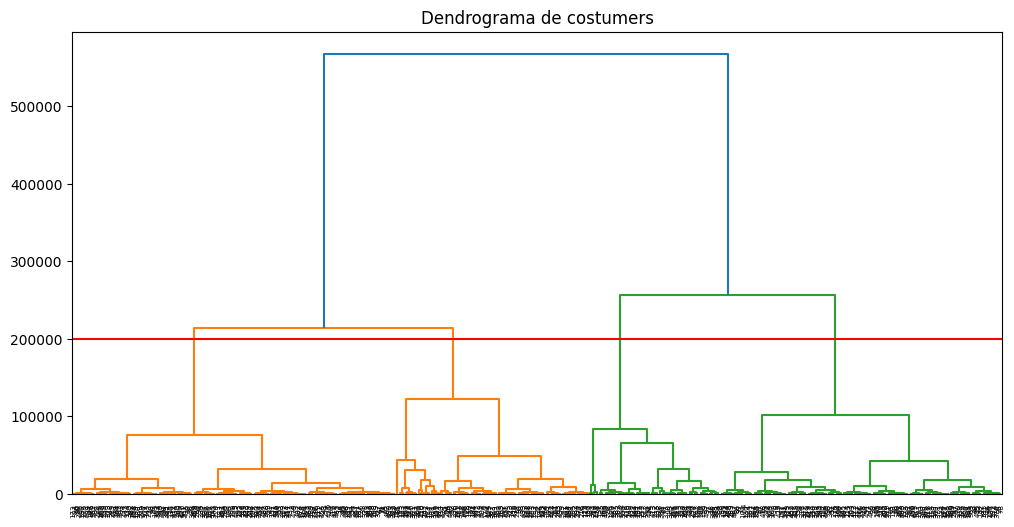

In [ ]:
# aqui muestro el dendrograma del dataframe
# un dendrograma muestra como se generan los clusters de un modelo de machine learning
# un cluster es como una agrupacion de una clasificacion de nuestro dataset
plt.figure(figsize=(12,6))
plt.title("Dendrograma de costumers")
X = df.iloc[:, [ 3,4]]
dendrogram = sch.dendrogram(sch.linkage(X,method='ward',metric='euclidean'))
plt.axhline(y=200000,color='r',linestyle='-')#graficar linea para ver clusters
plt.show()

In [ ]:
# aqui utilizo un modelo de machine learning llamado agglomerative clustering
# y lo entreno para hacer predicciones
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hc.fit(X)
y_hc = hc.fit_predict(X)

In [ ]:
data_labels = hc.labels_

In [ ]:
print(X.columns)

Index(['Limite_TC', 'Tiempo_cliente'], dtype='object')


Text(0.5, 1.0, 'clientes')

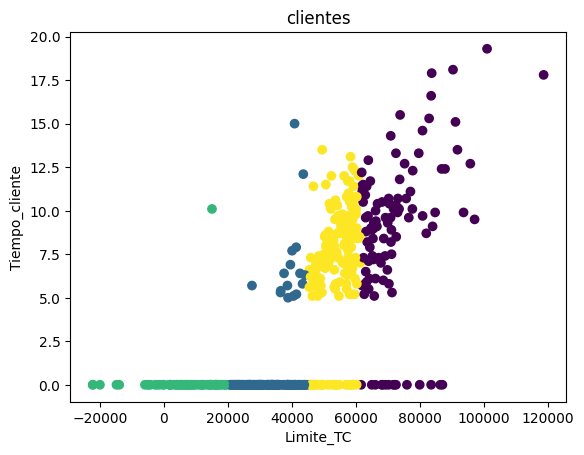

In [ ]:
# aqui muestro un grafico de dispersion que muestra los datos del estudio de clientes
plt.scatter(X['Limite_TC'], X['Tiempo_cliente'], c=data_labels)
plt.xlabel('Limite_TC')
plt.ylabel('Tiempo_cliente')
plt.title('clientes')

In [ ]:
# aqui procedo a hacer una estandarizacion de mis datos antes de hacer un PCA
# estandarizar los datos es necesario para su clasificacion o agrupacion
import pandas as pd
from sklearn.preprocessing import StandardScaler

variables_to_standardize = X.columns

# Inicializa el StandardScaler
scaler = StandardScaler()

# Aplica la estandarización a las variables seleccionadas
df[variables_to_standardize] = scaler.fit_transform(df[variables_to_standardize])


In [ ]:
# aqui hago un PCA con 2 componentes para reducir la dimensionalidad de mis datos
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_f = pca.fit_transform(df)
pca.explained_variance_ratio_.cumsum()

array([0.9999999 , 0.99999997])

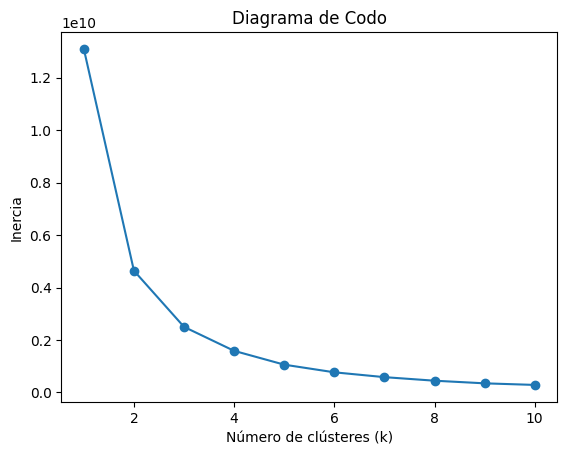

In [ ]:
# aqui hago uso del modelo KMeans para hacer un diagrama de codo y determinar con este
# el numero adecuado de clusterers
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_f)
    inertia.append(kmeans.inertia_)
#diagrama de codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Diagrama de Codo')
plt.show()

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from matplotlib import pyplot


In [ ]:
# aqui usa make_classifications para crear un modelo de datos sintetico
# Definimos el dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Imprimimos el dataset
print(X.shape, y.shape)

(100, 20) (100,)


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:
# aqui hago un modelo de agglomerative clustering con los 4 clusters que me indica el diagrama de codo
model = AgglomerativeClustering(n_clusters=4)
# Evaluamos el modelo
cv = KFold(n_splits=10, random_state=1, shuffle=True)
silhouette_scores = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    model.fit(X_train)
    labels = model.labels_
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)
# Imprimimos el rendimiento
print('Silhouette Score: %.3f (%.3f)' % (np.mean(silhouette_scores), np.std(silhouette_scores)))

Silhouette Score: 0.139 (0.013)
